# <span style="color:blue">Bengali.AI Handwritten Grapheme Classification</span>

## <span style="color:purple">This kernal is used to compare both mono-output and multi-output CNN model for this perticular problem</span>

### This Kernal is for beginners who are new for KERAS and TnsorFlow,
### This kernal is teaches how to create your own custom CNN models layer by layer !!


To understand this you need to know ,
    1. Python
    2. Basics of Keras and TF
    3. Basic Understanding for CNN
    
    
### <span style="color:red">Upvote If you like</span>
#### If you are ready for a level up - [Bengali.AI : Tutorial-Design ResNet Layer by Layer](https://www.kaggle.com/chekoduadarsh/bengali-ai-tutorial-design-resnet-layer-by-layer)
#### If you want to Ensemble a CNN with ML (On a different challange but adaptable) - [hybrid CNN + XGboost + GNB, accuracy ~ 99%](https://www.kaggle.com/chekoduadarsh/hybrid-cnn-xgboost-gnb-accuracy-99)

## Import  Libraries
Import all the needed libraries all at one place so that you don't have to be confused.

In [ ]:

#Load em...
from matplotlib import pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import PIL.Image as Image, PIL.ImageDraw as ImageDraw, PIL.ImageFont as ImageFont
import random 
import os
import cv2
import gc
from tqdm.auto import tqdm


import numpy as np
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import clone_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import datetime as dt


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Load the required Data
We need only train.csv and parquets which will be loaded while training!!
Dont waste RAM by loading un wanted DATA

In [2]:
train_data = pd.read_csv('/kaggle/input/bengaliai-cv19/train.csv')

In [3]:
def resize(df, size=64, need_progress_bar=True):
    resized = {}
    for i in range(df.shape[0]):
        image = cv2.resize(df.loc[df.index[i]].values.reshape(137,236),(size,size))
        resized[df.index[i]] = image.reshape(-1)
    resized = pd.DataFrame(resized).T
    return resized

### Use the install tensorflow to change tensorflow version of the program if you find a version related bug

In [4]:
#!pip install tensorflow

In [5]:
 print(tf.version)

<module 'tensorflow_core._api.v2.version' from '/opt/conda/lib/python3.6/site-packages/tensorflow_core/_api/v2/version/__init__.py'>


# Design- CNN-3model(mono-output)

This kind of neural network will have 1 input and 1 output since we need to find Grapheme root, Vowel and Consonant we need to copy the model thrice and train them separately. This increases memory/RAM required to solve thiss probem but this gives us freedom to edit and manipulate each model according to the classification complexity.

### <span style="color:red">Advantages</span>

1. Control over each independent model
2. Adaptability on each model and can use or edit them separately
3. Can change/tune hyperparameters for each module separately according to the classification complexity


### <span style="color:red">Disadvantages</span>
1. High RAM/Memory uage
2. More training time
3. makes it tedious to tune hyperparameters independently

In [6]:
def cnn3model(outputsize):
    inputs = keras.Input(shape=(64,64,1))
    x = layers.Conv2D(32, (3,3), activation='relu')(inputs)
    model = tf.nn.leaky_relu(x, alpha=0.01, name='Leaky_ReLU') 
    model = layers.Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
    model = tf.nn.leaky_relu(model, alpha=0.01, name='Leaky_ReLU') 
    model = layers.BatchNormalization(momentum=0.15)(model)
    model = layers.MaxPool2D(pool_size=(2, 2))(model)
    model = layers.Conv2D(filters=32, kernel_size=(5, 5), padding='SAME', activation='relu')(model)
    model = tf.nn.leaky_relu(model, alpha=0.01, name='Leaky_ReLU') 
    model = layers.Dropout(rate=0.3)(model)

    model = layers.Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
    model = tf.nn.leaky_relu(model, alpha=0.01, name='Leaky_ReLU') 
    model = layers.BatchNormalization(momentum=0.15)(model)
    model = layers.Dropout(rate=0.3)(model)
    model = layers.Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
    model = tf.nn.leaky_relu(model, alpha=0.01, name='Leaky_ReLU') 
    model = layers.Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
    model = tf.nn.leaky_relu(model, alpha=0.01, name='Leaky_ReLU') 
    model = layers.BatchNormalization(momentum=0.15)(model)
    model = layers.MaxPool2D(pool_size=(2, 2))(model)
    model = layers.Conv2D(filters=64, kernel_size=(5, 5), padding='SAME', activation='relu')(model)
    model = tf.nn.leaky_relu(model, alpha=0.01, name='Leaky_ReLU') 
    model = layers.BatchNormalization(momentum=0.15)(model)
    model = layers.Dropout(rate=0.3)(model)

    model = layers.Flatten()(model)
    model = layers.Dense(1024, activation = "relu")(model)
    model = layers.Dropout(rate=0.3)(model)
    dense = layers.Dense(512, activation = "relu")(model)
    
    output = layers.Dense(outputsize, activation='softmax')(dense)
    model = keras.Model(inputs, output)
    return model

## Copy the model into 3 different models

In [7]:
cnn3model_root = cnn3model(168)
cnn3model_vowel = cnn3model(11)
cnn3model_consonant = cnn3model(7)

## Using Adam optimizer one of the best algorithms 

You can tryout "RMSProp" , "Adadelta" to see the difference

In [8]:
cnn3model_root.compile(optimizer="adam", loss=['categorical_crossentropy'], metrics=['accuracy']) # Adam optimizer with catagorical_crossentropy modern best
cnn3model_vowel.compile(optimizer="adam", loss=['categorical_crossentropy'], metrics=['accuracy'])
cnn3model_consonant.compile(optimizer="adam", loss=['categorical_crossentropy'], metrics=['accuracy'])

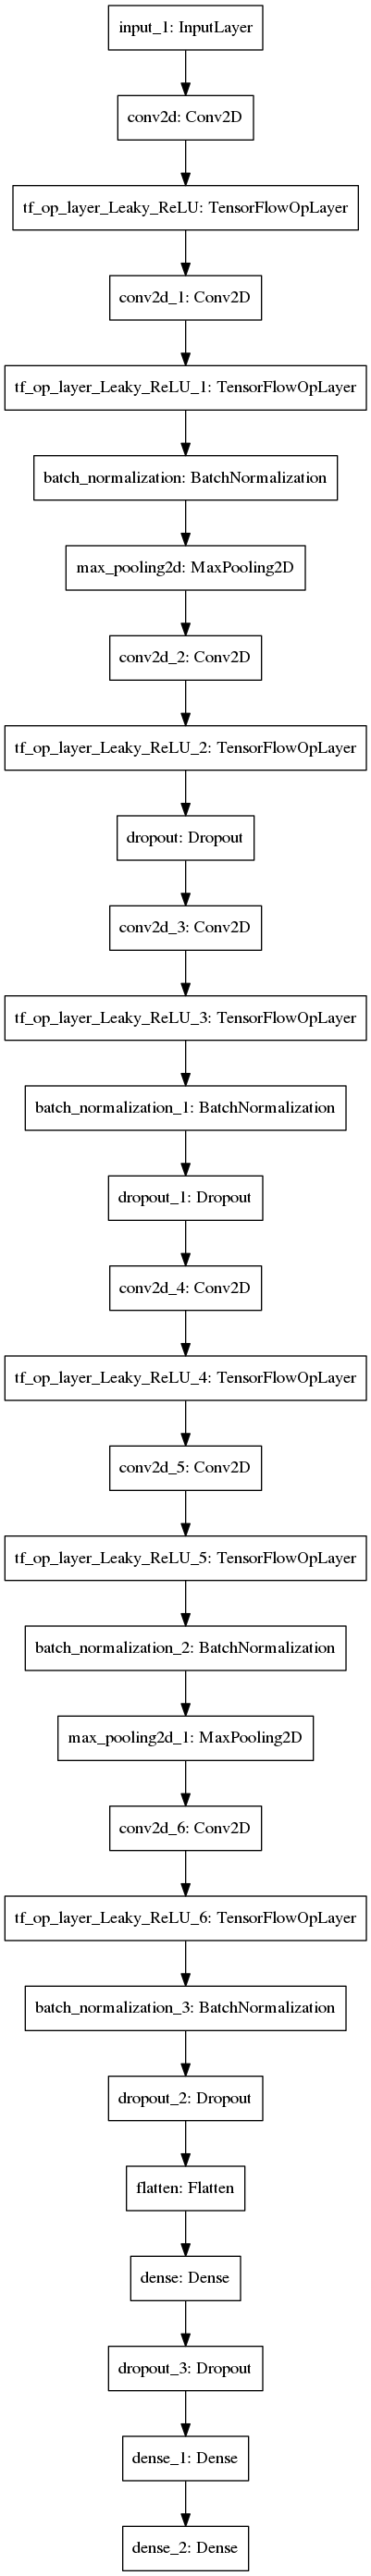

In [9]:
plot_model(cnn3model_root, to_file='model1.png')

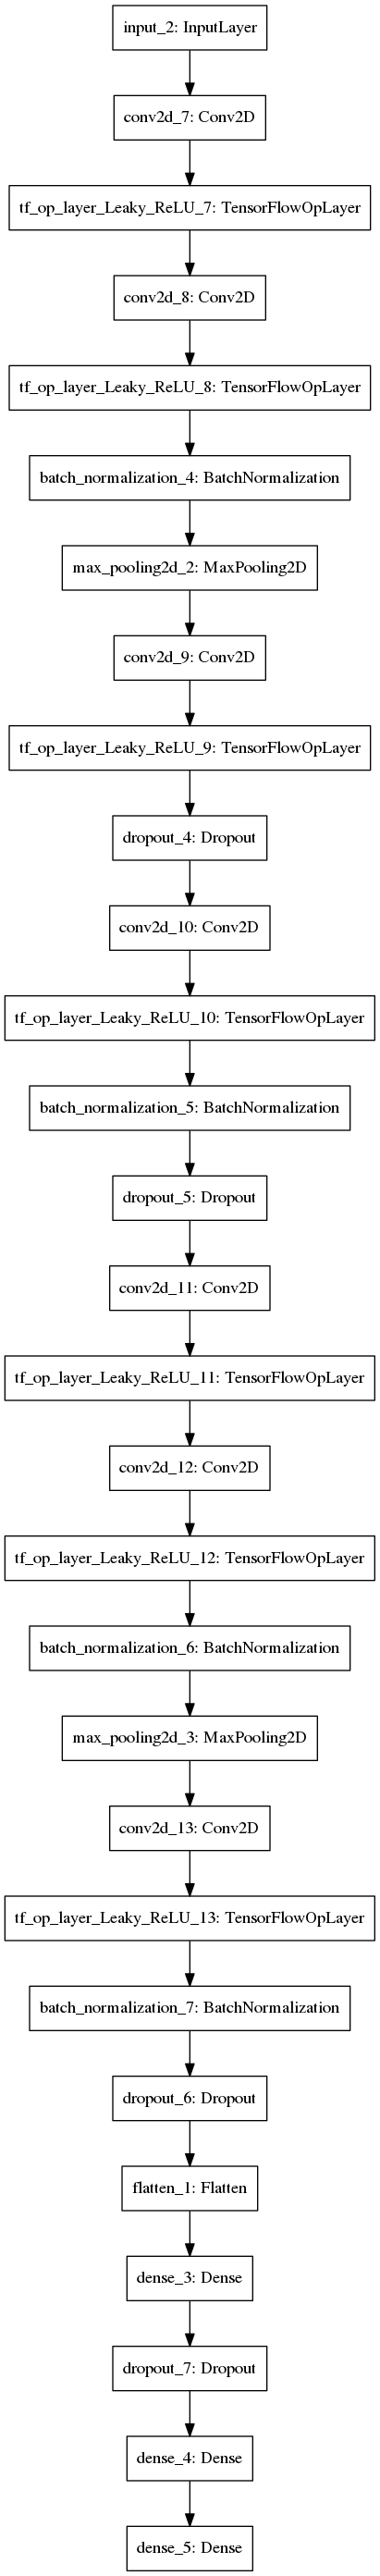

In [10]:
plot_model(cnn3model_vowel, to_file='model2.png')

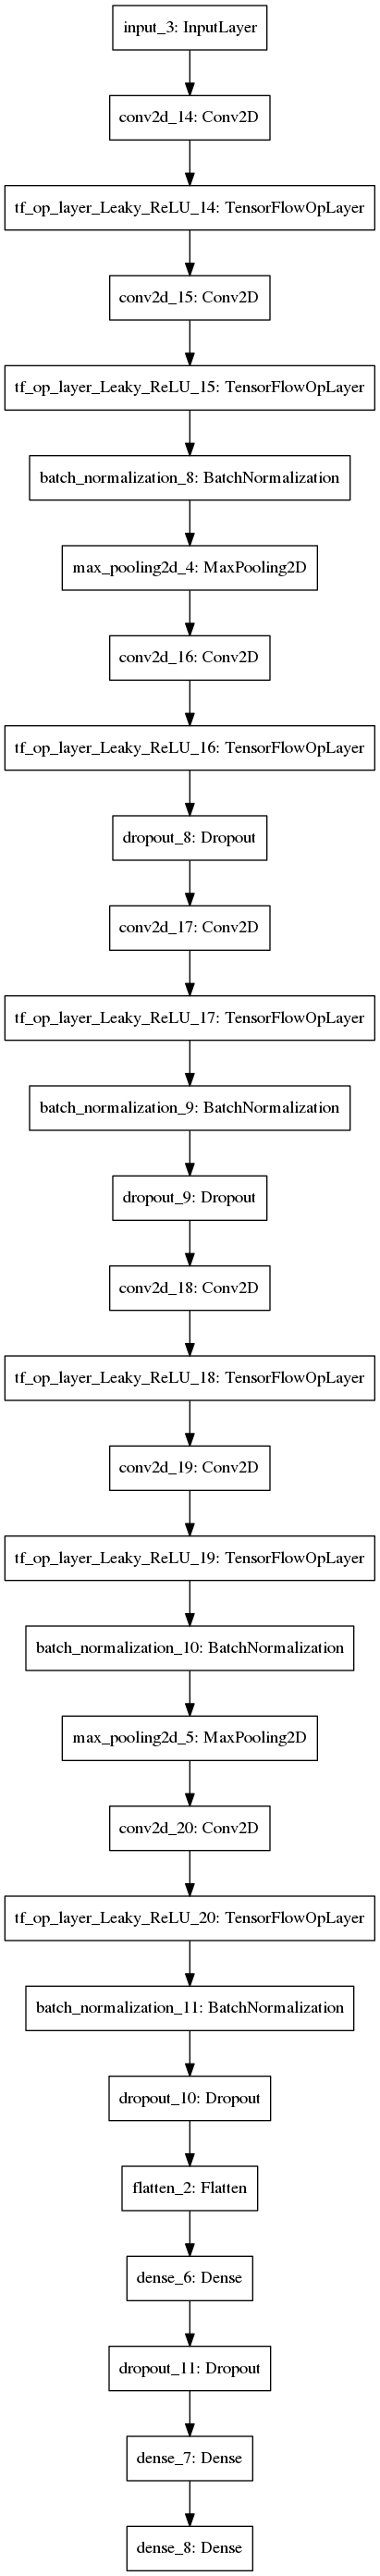

In [11]:
plot_model(cnn3model_consonant, to_file='mode3.png')

# Design- CNN-1model(multi-output)

This is a bit complex model where we use 1 input and multiple output CNN model, In this perticualr case 3 outputs to predict each Grapheme root, Vowel and Consonent. 
### <span style="color:red">Advantages</span>
1. Reduced memory/RAM usage
2. Less training time

### <span style="color:red">Disadvantages</span>
1. Bit hard to design 
2. Can edit Each model separately

In [12]:
inputs = keras.Input(shape = (64, 64, 1))

model = layers.Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu')(inputs)
model = tf.nn.leaky_relu(model, alpha=0.01, name='Leaky_ReLU') 
model = layers.Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = tf.nn.leaky_relu(model, alpha=0.01, name='Leaky_ReLU') 
model = layers.BatchNormalization(momentum=0.15)(model)
model = layers.MaxPool2D(pool_size=(2, 2))(model)
model = layers.Conv2D(filters=32, kernel_size=(5, 5), padding='SAME', activation='relu')(model)
model = tf.nn.leaky_relu(model, alpha=0.01, name='Leaky_ReLU') 
model = layers.Dropout(rate=0.3)(model)

model = layers.Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = tf.nn.leaky_relu(model, alpha=0.01, name='Leaky_ReLU') 
model = layers.BatchNormalization(momentum=0.15)(model)
model = layers.Dropout(rate=0.3)(model)
model = layers.Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = tf.nn.leaky_relu(model, alpha=0.01, name='Leaky_ReLU') 
model = layers.Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu')(model)
model = tf.nn.leaky_relu(model, alpha=0.01, name='Leaky_ReLU') 
model = layers.BatchNormalization(momentum=0.15)(model)
model = layers.MaxPool2D(pool_size=(2, 2))(model)
model = layers.Conv2D(filters=64, kernel_size=(5, 5), padding='SAME', activation='relu')(model)
model = tf.nn.leaky_relu(model, alpha=0.01, name='Leaky_ReLU') 
model = layers.BatchNormalization(momentum=0.15)(model)
model = layers.Dropout(rate=0.3)(model)

model = layers.Flatten()(model)
model = layers.Dense(1024, activation = "relu")(model)
model = layers.Dropout(rate=0.3)(model)
dense = layers.Dense(512, activation = "relu")(model)
    
out_root = layers.Dense(168, activation='softmax', name='root_out')(dense) 
out_vowel = layers.Dense(11, activation='softmax', name='vowel_out')(dense) 
out_consonant = layers.Dense(7, activation='softmax', name='consonant_out')(dense)
    

cnn1model = keras.Model(inputs=inputs, outputs=[out_root, out_vowel, out_consonant])


In [13]:
cnn1model.compile(optimizer="adam", loss=['categorical_crossentropy','categorical_crossentropy','categorical_crossentropy'], metrics=['accuracy']) # Adam optimizer with catagorical_crossentropy modern best

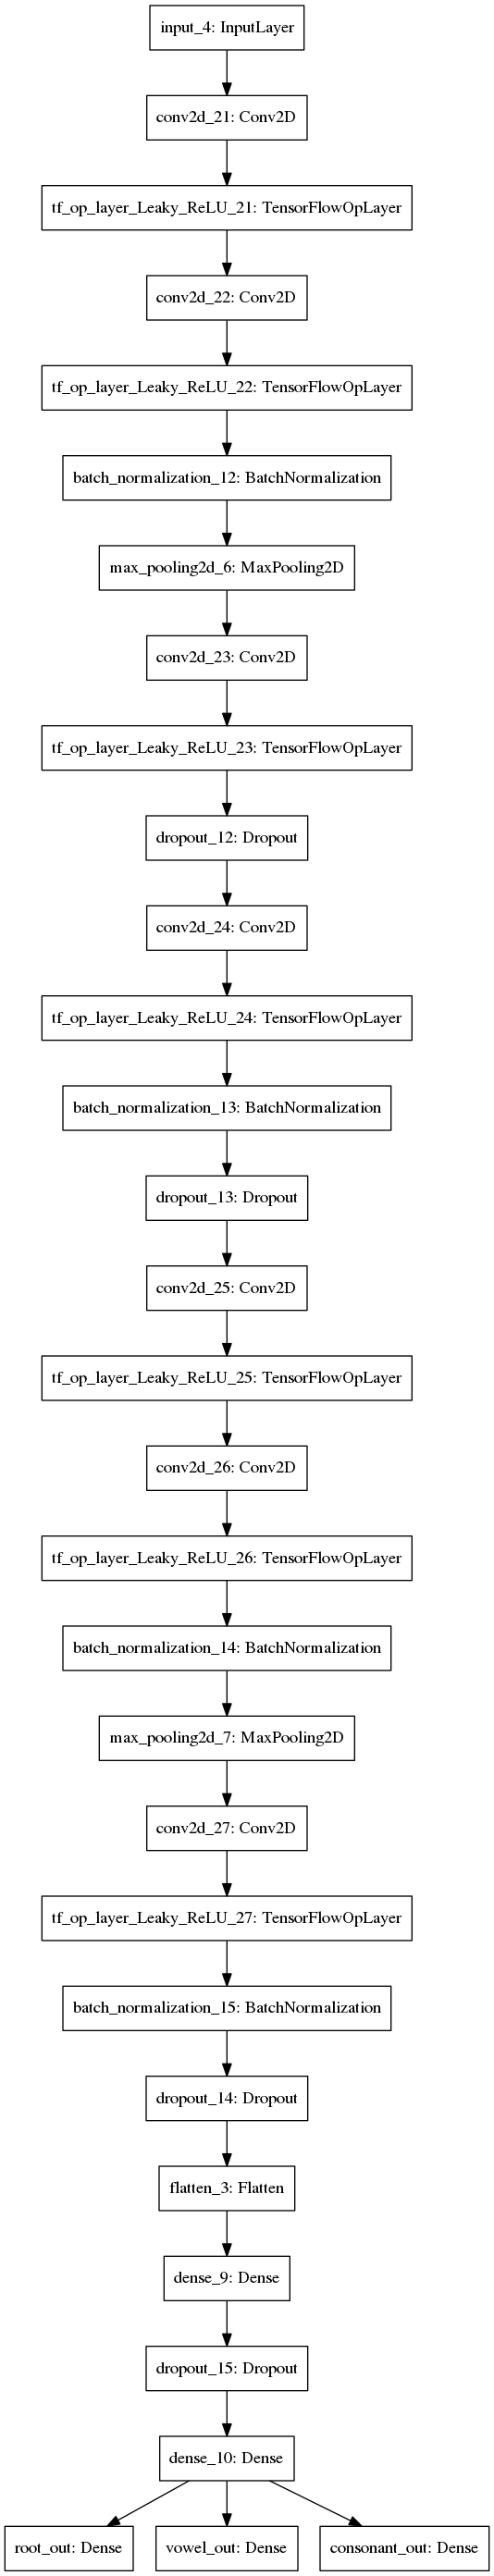

In [14]:
plot_model(cnn1model, to_file='mode4.png')

## Train- 3model(mono-output)
To Train the model I made python dictionary which has all the trained model, which will be called training one after another, So we will be using Image Generator to augment the data and introduce randomness into our dataset, this will help us to achive better accuracy score.

NOTE :- Calling .fit again after training will fit the new data to previously trained model so there is no discontinuity

NOTE :- Set epochs to 25~30 for better results

NOTE :- Set batchsize to 128 for better results

In [15]:
batch_size = 64
epochs = 5

In [16]:
model_dict = {
    'grapheme_root': cnn3model_root,
    'vowel_diacritic': cnn3model_vowel,
    'consonant_diacritic': cnn3model_consonant
}

history_list = []
train_data = pd.read_csv('/kaggle/input/bengaliai-cv19/train.csv')

In [17]:
for i in range(1):
    b_train_data =  pd.merge(pd.read_parquet(f'/kaggle/input/bengaliai-cv19/train_image_data_{i}.parquet'), train_data, on='image_id').drop(['image_id'], axis=1)
    print("Data Loaded")
    train_image = b_train_data.drop(['grapheme_root', 'vowel_diacritic', 'consonant_diacritic','grapheme'], axis=1)
    train_image = resize(train_image)/255
    train_image = train_image.values.reshape(-1, 64, 64, 1) # Image with 64x64x1 diamentions
    
    for target in ['grapheme_root', 'vowel_diacritic', 'consonant_diacritic']:
        Y_train = b_train_data[target]
        Y_train = pd.get_dummies(Y_train).values
        x_train, x_test, y_train, y_test = train_test_split(train_image, Y_train, test_size=0.05, random_state=666)
        datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            rotation_range=8,  # randomly rotate images in the range (degrees, 0 to 180)
            zoom_range = 0.15, # Randomly zoom image 
            width_shift_range=0.15,  # randomly shift images horizontally (fraction of total width)
            height_shift_range=0.15,  # randomly shift images vertically (fraction of total height)
            horizontal_flip=False,  # randomly flip images
            vertical_flip=False)  # randomly flip images


        # This will just calculate parameters required to augment the given data. This won't perform any augmentations
        datagen.fit(x_train)
        history = model_dict[target].fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                                      epochs = epochs, validation_data = (x_test, y_test),
                                      steps_per_epoch=x_train.shape[0] // batch_size)
        history_list.append(history)
        #histories.append(history)
        del x_train
        del x_test
        del y_train
        del y_test
        history_list.append(history)
        gc.collect()  #Garbage Collector
        
    # Delete to reduce memory usage
    del train_image
    del train_data
    gc.collect()   #Garbage Collector

Data Loaded
Train for 745 steps, validate on 2511 samples
Epoch 1/5
745/745 [==============================] - 36s 48ms/step - loss: 4.5622 - accuracy: 0.0447 - val_loss: 40.0507 - val_accuracy: 0.0119
Epoch 2/5
745/745 [==============================] - 32s 43ms/step - loss: 3.6097 - accuracy: 0.1554 - val_loss: 4.5787 - val_accuracy: 0.2123
Epoch 3/5
745/745 [==============================] - 32s 42ms/step - loss: 2.4836 - accuracy: 0.3454 - val_loss: 1.7538 - val_accuracy: 0.5022
Epoch 4/5
745/745 [==============================] - 32s 42ms/step - loss: 1.8637 - accuracy: 0.4920 - val_loss: 1.3217 - val_accuracy: 0.6256
Epoch 5/5
745/745 [==============================] - 32s 42ms/step - loss: 1.5212 - accuracy: 0.5784 - val_loss: 0.9992 - val_accuracy: 0.7101
Train for 745 steps, validate on 2511 samples
Epoch 1/5
745/745 [==============================] - 32s 43ms/step - loss: 1.0474 - accuracy: 0.6455 - val_loss: 1.2194 - val_accuracy: 0.6750
Epoch 2/5
745/745 [==================

## Use Garbage Collector Wisely to save RAM

{'loss': [4.561748136152209, 3.6087043559299734, 2.483440853464049, 1.8633065390314074, 1.520880472090733], 'accuracy': [0.044673033, 0.15541093, 0.34541827, 0.49197018, 0.57837725], 'val_loss': [40.05065642007078, 4.578691676146288, 1.753805720108242, 1.3216533622434061, 0.9991709957294662], 'val_accuracy': [0.011947432, 0.21226603, 0.50219035, 0.6256471, 0.7100757]}


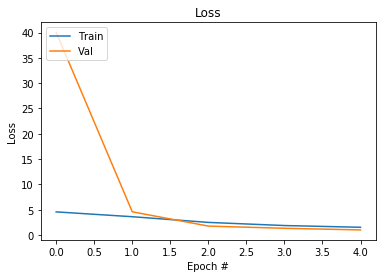

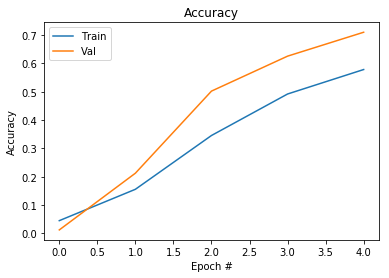

{'loss': [4.561748136152209, 3.6087043559299734, 2.483440853464049, 1.8633065390314074, 1.520880472090733], 'accuracy': [0.044673033, 0.15541093, 0.34541827, 0.49197018, 0.57837725], 'val_loss': [40.05065642007078, 4.578691676146288, 1.753805720108242, 1.3216533622434061, 0.9991709957294662], 'val_accuracy': [0.011947432, 0.21226603, 0.50219035, 0.6256471, 0.7100757]}


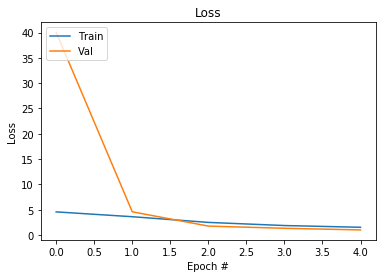

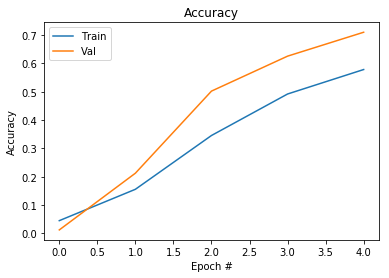

{'loss': [1.0477759013511807, 0.5478006932709667, 0.45175275130550696, 0.399974412103884, 0.3665796341851762], 'accuracy': [0.64547074, 0.8215598, 0.85178965, 0.8703684, 0.8824394], 'val_loss': [1.21935420492549, 1.6557245150071984, 0.2706928264093038, 0.2859770266872533, 0.258934311904028], 'val_accuracy': [0.6750299, 0.57506967, 0.9167662, 0.9123855, 0.91437674]}


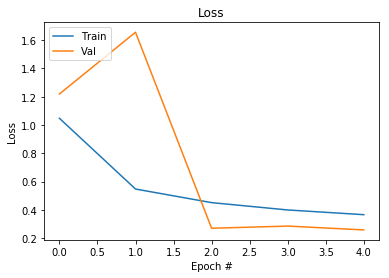

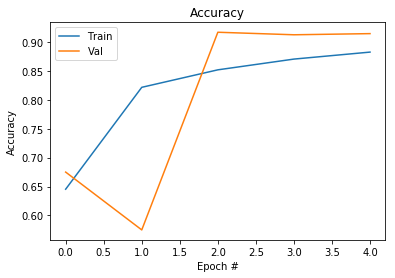

{'loss': [1.0477759013511807, 0.5478006932709667, 0.45175275130550696, 0.399974412103884, 0.3665796341851762], 'accuracy': [0.64547074, 0.8215598, 0.85178965, 0.8703684, 0.8824394], 'val_loss': [1.21935420492549, 1.6557245150071984, 0.2706928264093038, 0.2859770266872533, 0.258934311904028], 'val_accuracy': [0.6750299, 0.57506967, 0.9167662, 0.9123855, 0.91437674]}


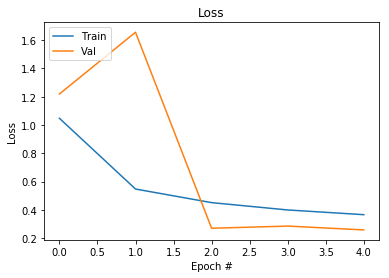

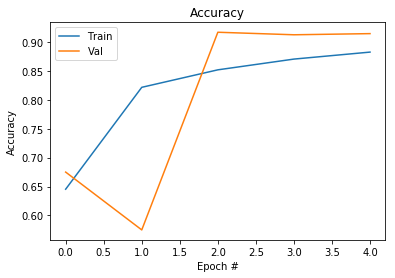

{'loss': [0.8948189868285847, 0.5153632439908343, 0.4198665177201479, 0.37066306750484335, 0.33658294013024026], 'accuracy': [0.70878553, 0.829768, 0.86281097, 0.8811168, 0.8907526], 'val_loss': [0.5895857484347314, 0.3096116148039242, 0.2590913996426815, 0.25734137109032384, 0.2361021585516225], 'val_accuracy': [0.8239745, 0.8964556, 0.911589, 0.9123855, 0.9251294]}


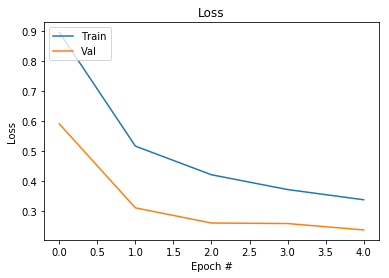

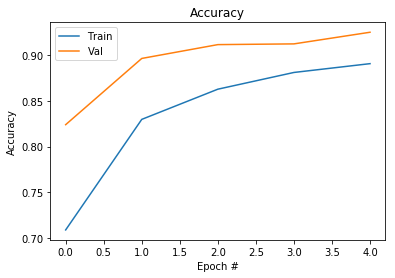

{'loss': [0.8948189868285847, 0.5153632439908343, 0.4198665177201479, 0.37066306750484335, 0.33658294013024026], 'accuracy': [0.70878553, 0.829768, 0.86281097, 0.8811168, 0.8907526], 'val_loss': [0.5895857484347314, 0.3096116148039242, 0.2590913996426815, 0.25734137109032384, 0.2361021585516225], 'val_accuracy': [0.8239745, 0.8964556, 0.911589, 0.9123855, 0.9251294]}


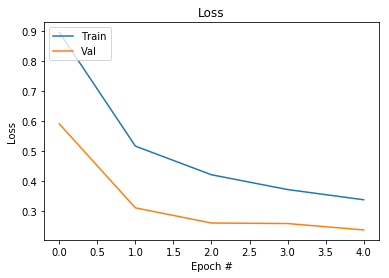

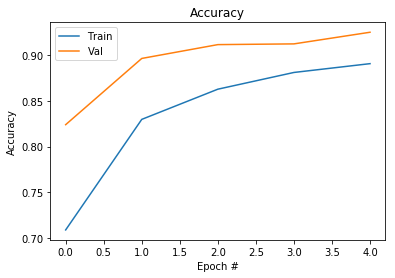

In [18]:
for history in history_list:
    print(history.history)
    plt.figure()
    plt.plot(np.arange(0, epochs), history.history['loss'], label='train_loss')
    plt.plot(np.arange(0, epochs), history.history['val_loss'], label='val_loss')
    plt.title("Loss")
    plt.xlabel('Epoch #')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
    
    plt.figure()
    plt.plot(np.arange(0, epochs), history.history['accuracy'], label='train_acc')
    plt.plot(np.arange(0, epochs), history.history['val_accuracy'], label='val_accuracy')
    plt.title("Accuracy")
    plt.xlabel('Epoch #')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()


## Train-1model(multi-output)
Here I had to make a custom multi-datagenerator which takes into consideration of 3-output case, here we will be saving more training time than previous model.


NOTE :- Set epochs to 25~30 for better results

NOTE :- Set batchsize to 128 for better results

In [19]:
batch_size = 64
epochs = 5

In [20]:
train_data = pd.read_csv('/kaggle/input/bengaliai-cv19/train.csv')
history_list = []

In [21]:
class MultiOutputDataGenerator(keras.preprocessing.image.ImageDataGenerator):

    def flow(self,
             x,
             y=None,
             batch_size=32,
             shuffle=True,
             sample_weight=None,
             seed=None,
             save_to_dir=None,
             save_prefix='',
             save_format='png',
             subset=None):

        targets = None
        target_lengths = {}
        ordered_outputs = []
        for output, target in y.items():
            if targets is None:
                targets = target
            else:
                targets = np.concatenate((targets, target), axis=1)
            target_lengths[output] = target.shape[1]
            ordered_outputs.append(output)


        for flowx, flowy in super().flow(x, targets, batch_size=batch_size,
                                         shuffle=shuffle):
            target_dict = {}
            i = 0
            for output in ordered_outputs:
                target_length = target_lengths[output]
                target_dict[output] = flowy[:, i: i + target_length]
                i += target_length

            yield flowx, target_dict

In [22]:
for i in range(1):
    b_train_data =  pd.merge(pd.read_parquet(f'/kaggle/input/bengaliai-cv19/train_image_data_{i}.parquet'), train_data, on='image_id').drop(['image_id'], axis =1)
    print("Data Loaded")
    #train_image = b_train_data.drop(['grapheme_root', 'vowel_diacritic', 'consonant_diacritic','grapheme'], axis=1)
    #train_image = resize(b_train_data.drop(['grapheme_root', 'vowel_diacritic', 'consonant_diacritic','grapheme'], axis=1))/255
    #train_image = (resize(b_train_data.drop(['grapheme_root', 'vowel_diacritic', 'consonant_diacritic','grapheme'], axis=1))/255).values.reshape(-1, 64, 64, 1) # Image with 64x64x1 diamentions
    #Y_train_root = pd.get_dummies(b_train_data['grapheme_root']).values
    #Y_train_vowel = pd.get_dummies(b_train_data['vowel_diacritic']).values
    #Y_train_consonant = pd.get_dummies(b_train_data['consonant_diacritic']).values
    x_train, x_test, y_train_root, y_test_root, y_train_vowel, y_test_vowel, y_train_consonant, y_test_consonant = train_test_split((resize(b_train_data.drop(['grapheme_root', 'vowel_diacritic', 'consonant_diacritic','grapheme'], axis=1))/255).values.reshape(-1, 64, 64, 1), pd.get_dummies(b_train_data['grapheme_root']).values, pd.get_dummies(b_train_data['vowel_diacritic']).values, pd.get_dummies(b_train_data['consonant_diacritic']).values, test_size=0.08, random_state=666)
    
    del b_train_data
    gc.collect()
    
    #del Y_train_root, Y_train_vowel, Y_train_consonant
    print("Del1")
    datagen = MultiOutputDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=8,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.20, # Randomly zoom image 
        width_shift_range=0.20,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.20,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


        # This will just calculate parameters required to augment the given data. This won't perform any augmentations
    datagen.fit(x_train)
    history = cnn1model.fit_generator(datagen.flow(x_train, {'root_out': y_train_root, 'vowel_out': y_train_vowel, 'consonant_out': y_train_consonant}, batch_size=batch_size),
            epochs = epochs, validation_data = (x_test, [y_test_root, y_test_vowel, y_test_consonant]), 
            steps_per_epoch=x_train.shape[0] // batch_size)
                                  
    history_list.append(history)
    del datagen
    del x_train
    del x_test
    del y_train_root
    del y_test_root
    del y_train_vowel
    del y_test_vowel
    del y_train_consonant
    del y_test_consonant    
    print("Del2")
    gc.collect()
del train_data
gc.collect()

Data Loaded
Del1
Train for 721 steps, validate on 4017 samples
Epoch 1/5
721/721 [==============================] - 34s 48ms/step - loss: 7.5057 - root_out_loss: 4.6688 - vowel_out_loss: 1.6943 - consonant_out_loss: 1.1426 - root_out_accuracy: 0.0331 - vowel_out_accuracy: 0.3788 - consonant_out_accuracy: 0.6211 - val_loss: 7.7909 - val_root_out_loss: 4.7161 - val_vowel_out_loss: 1.9277 - val_consonant_out_loss: 1.1456 - val_root_out_accuracy: 0.0378 - val_vowel_out_accuracy: 0.2766 - val_consonant_out_accuracy: 0.6134
Epoch 2/5
721/721 [==============================] - 33s 46ms/step - loss: 6.4111 - root_out_loss: 4.2554 - vowel_out_loss: 1.1805 - consonant_out_loss: 0.9753 - root_out_accuracy: 0.0577 - vowel_out_accuracy: 0.5779 - consonant_out_accuracy: 0.6494 - val_loss: 5.7394 - val_root_out_loss: 3.9591 - val_vowel_out_loss: 0.8757 - val_consonant_out_loss: 0.9031 - val_root_out_accuracy: 0.0856 - val_vowel_out_accuracy: 0.6724 - val_consonant_out_accuracy: 0.6517
Epoch 3/5
721/7

0

In [23]:
%matplotlib inline
def plot_loss(his, epoch, title):
    plt.figure()
    plt.plot(np.arange(0, epoch), his.history['loss'], label='train_loss')
    plt.plot(np.arange(0, epoch), his.history['root_out_loss'], label='train_root_loss')
    plt.plot(np.arange(0, epoch), his.history['vowel_out_loss'], label='train_vowel_loss')
    plt.plot(np.arange(0, epoch), his.history['consonant_out_loss'], label='train_consonant_loss')
    
    plt.plot(np.arange(0, epoch), his.history['val_root_out_loss'], label='val_train_root_loss')
    plt.plot(np.arange(0, epoch), his.history['val_vowel_out_loss'], label='val_train_vowel_loss')
    plt.plot(np.arange(0, epoch), his.history['val_consonant_out_loss'], label='val_train_consonant_loss')
    
    plt.title(title)
    plt.xlabel('Epoch #')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.show()

def plot_acc(his, epoch, title):
    plt.figure()
    plt.plot(np.arange(0, epoch), his.history['root_out_accuracy'], label='train_root_acc')
    plt.plot(np.arange(0, epoch), his.history['vowel_out_accuracy'], label='train_vowel_accuracy')
    plt.plot(np.arange(0, epoch), his.history['consonant_out_accuracy'], label='train_consonant_accuracy')
    
    plt.plot(np.arange(0, epoch), his.history['val_root_out_accuracy'], label='val_root_acc')
    plt.plot(np.arange(0, epoch), his.history['val_vowel_out_accuracy'], label='val_vowel_accuracy')
    plt.plot(np.arange(0, epoch), his.history['val_consonant_out_accuracy'], label='val_consonant_accuracy')
    plt.title(title)
    plt.xlabel('Epoch #')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper right')
    plt.show()

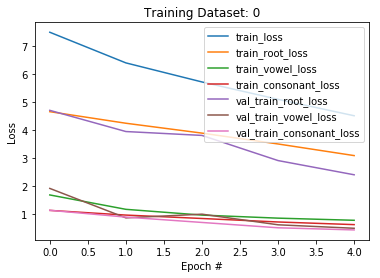

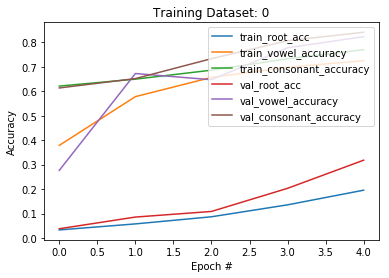

In [24]:
for dataset in range(1):
    plot_loss(history_list[dataset], epochs, f'Training Dataset: {dataset}')
    plot_acc(history_list[dataset], epochs, f'Training Dataset: {dataset}')
